In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('DBdataset/training_set',
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 476 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('DBdataset/test_set',
                                            target_size = (50, 50),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 197 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [9]:
cnn=Sequential()
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[50, 50, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50,callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 2s 131ms/step - loss: 0.7440 - accuracy: 0.5231 - val_loss: 0.6718 - val_accuracy: 0.6091
Epoch 2/50
15/15 [==============================] - 2s 120ms/step - loss: 0.6443 - accuracy: 0.6429 - val_loss: 0.5891 - val_accuracy: 0.7056
Epoch 3/50
15/15 [==============================] - 2s 120ms/step - loss: 0.5811 - accuracy: 0.6954 - val_loss: 0.5220 - val_accuracy: 0.7563
Epoch 4/50
15/15 [==============================] - 2s 120ms/step - loss: 0.5284 - accuracy: 0.7500 - val_loss: 0.4920 - val_accuracy: 0.7665
Epoch 5/50
15/15 [==============================] - 2s 120ms/step - loss: 0.5114 - accuracy: 0.7311 - val_loss: 0.5065 - val_accuracy: 0.7462
Epoch 6/50
15/15 [==============================] - 2s 119ms/step - loss: 0.5225 - accuracy: 0.7374 - val_loss: 0.5196 - val_accuracy: 0.7411
Epoch 7/50
15/15 [==============================] - 2s 120ms/step - loss: 0.5118 - accuracy: 0.7542 - val_loss: 0.4739 - val_accuracy: 0.7970
Epoch 

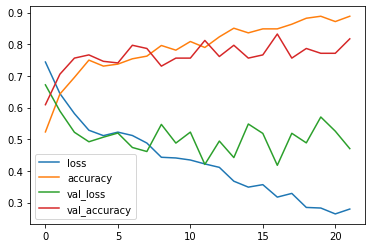

In [11]:
mod_losses=pd.DataFrame(cnn.history.history)
mod_losses.plot()

In [12]:
training_set.class_indices

{'goku': 0, 'vegeta': 1}

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('DBdataset/pred_set/images.jpeg', target_size = (50, 50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'vegeta'
else:
  prediction = 'goku'
print(prediction)

goku
